# Degree and Closeness Centrality

In [1]:
import networkx as nx 
G = nx.Graph()
G.add_edges_from([('A','B'),('A','G'),('A','E'),('A','C'),('A','N'),('E','D'),('E','B'),('E','C'),('D','C'),('D','B'),('C','B'),
                   ('G','H'),('G','I'),('G','F'),('G','J'),('J','I'),('H','I'),('F','I'),('J','I'),('F','j'),
                  ('J','O'),('N','O'),('N','O'),('N','L'),('M','L'),('M','K'),('L','K'),('K','O'),('L','O')])

In [2]:
#Network centrality : the most important nodes in network :
#list of centrality measures commenly used [degree centrality ,closeness centrality,betweenness centrality, load centrality,
                                                    #    page rank, katz centrality , percolation centrality]

In [3]:
#degree centrality : important node have many connection #number of neigbours
#undi network --> use degree
#DiG  network --> use in degree or out degree
# for un dir : C(deg) = d(v)/|N|-1 .... N isset of nodes in network and d(v) is degree of node v
"""So, in this case a node would have a centrality of one if it's connected to every single node in the network 
and a centrality of zero if it's connected to no node in the network. """
#G= nx.convert_node_labels_to_integers(G,first_label=1)

"So, in this case a node would have a centrality of one if it's connected to every single node in the network \nand a centrality of zero if it's connected to no node in the network. "

In [4]:
degcent=nx.degree_centrality(G)
degcent

{'A': 0.3333333333333333,
 'B': 0.26666666666666666,
 'G': 0.3333333333333333,
 'E': 0.26666666666666666,
 'C': 0.26666666666666666,
 'N': 0.2,
 'D': 0.2,
 'H': 0.13333333333333333,
 'I': 0.26666666666666666,
 'F': 0.2,
 'J': 0.2,
 'j': 0.06666666666666667,
 'O': 0.26666666666666666,
 'L': 0.26666666666666666,
 'M': 0.13333333333333333,
 'K': 0.2}

In [5]:
degcent['B'] #4/(16-1)

0.26666666666666666

In [6]:
G1 = nx.DiGraph()
G1.add_edges_from([('A','B'),('A','G'),('A','E'),('A','C'),('A','N'),('E','D'),('E','B'),('E','C'),('D','C'),('D','B'),('C','B'),
                   ('G','H'),('G','I'),('G','F'),('G','J'),('J','I'),('H','I'),('F','I'),('J','I'),('F','j'),
                  ('J','O'),('N','O'),('N','O'),('N','L'),('M','L'),('M','K'),('L','K'),('K','O'),('L','O'),('O','N')])

In [7]:
# in-degree C(indeg) = d(inv)/|N|-1 .
#note nothing go to A so zero / amy no = 0 u can calculate the other
degcent1=nx.in_degree_centrality(G1)
degcent1

{'A': 0.0,
 'B': 0.26666666666666666,
 'G': 0.06666666666666667,
 'E': 0.06666666666666667,
 'C': 0.2,
 'N': 0.13333333333333333,
 'D': 0.06666666666666667,
 'H': 0.06666666666666667,
 'I': 0.26666666666666666,
 'F': 0.06666666666666667,
 'J': 0.06666666666666667,
 'j': 0.06666666666666667,
 'O': 0.26666666666666666,
 'L': 0.13333333333333333,
 'M': 0.0,
 'K': 0.13333333333333333}

In [8]:
#out-degree .... C(outdeg) = d(outv)/|N|-1 
degcent2=nx.out_degree_centrality(G1)
degcent2

{'A': 0.3333333333333333,
 'B': 0.0,
 'G': 0.26666666666666666,
 'E': 0.2,
 'C': 0.06666666666666667,
 'N': 0.13333333333333333,
 'D': 0.13333333333333333,
 'H': 0.06666666666666667,
 'I': 0.0,
 'F': 0.13333333333333333,
 'J': 0.13333333333333333,
 'j': 0.0,
 'O': 0.06666666666666667,
 'L': 0.13333333333333333,
 'M': 0.13333333333333333,
 'K': 0.06666666666666667}

# Closeness centrality

In [9]:
#important node close to another node (short distance away from all other nodes in the network. )

#Cclose(v)=|N|-1/ΣueN\(v)^^d(v,u)... مرفوع لاس
#distance between node V and other nodes "So, that's the sum and the denominator in the definition of centrality."


In [10]:
clocenter = nx.closeness_centrality(G)
clocenter

{'A': 0.5357142857142857,
 'B': 0.39473684210526316,
 'G': 0.5,
 'E': 0.39473684210526316,
 'C': 0.39473684210526316,
 'N': 0.45454545454545453,
 'D': 0.3,
 'H': 0.3488372093023256,
 'I': 0.4166666666666667,
 'F': 0.36585365853658536,
 'J': 0.4411764705882353,
 'j': 0.2727272727272727,
 'O': 0.42857142857142855,
 'L': 0.375,
 'M': 0.2830188679245283,
 'K': 0.32608695652173914}

In [11]:
sum(nx.shortest_path_length(G,'A').values() ) # مجموع كل ال paths

28

In [12]:
len(G.nodes())-1 

15

In [13]:
15/28 #closcenter for A

0.5357142857142857

In [14]:
"""Of course, we're making the implicit assumption that all the nodes can actually reach all the other nodes,
but of course, this is not always the case. In particular, when we have directed graphs, 
this is often not the case and even for undirected graphs you can have multiple connected components and you can have it 
so that some nodes cannot reach other nodes. 
And so, what happens, 
how do we measure closeness centrality when a node cannot actually reach all the other nodes"""
# option 1 : conseder only only noeds that (L node) can reach 
#Cclose(L)=|R(L)|/ΣueR(L)^^d(L,u) ....R(L) is set of nodes that L can actually reach we find o gonna be o shortest pass = 1 
#and  only reach to N so 1/1 =1 ..1 is high for node than can only reach one other node so 


"Of course, we're making the implicit assumption that all the nodes can actually reach all the other nodes,\nbut of course, this is not always the case. In particular, when we have directed graphs, \nthis is often not the case and even for undirected graphs you can have multiple connected components and you can have it \nso that some nodes cannot reach other nodes. \nAnd so, what happens, \nhow do we measure closeness centrality when a node cannot actually reach all the other nodes"

In [15]:
#option 2 : conseder only only noeds that L can reach and normalize by the fraction of nodes L can reach
#Cclose(L)=(|R(L)|/|N-1|)/ΣueR(L)^^d(L,u)
#closecent = nx.closeness_centrality(G1,normalized=False) #normalizedbecame Invalid with degree now in networkx 2.2 
#use wf_improved ...i'm not sure 
closecent = nx.closeness_centrality(G1,wf_improved=False)
closecent

{'A': 0.0,
 'B': 1.0,
 'G': 1.0,
 'E': 1.0,
 'C': 1.0,
 'N': 0.5,
 'D': 0.6666666666666666,
 'H': 0.6666666666666666,
 'I': 0.8333333333333334,
 'F': 0.6666666666666666,
 'J': 0.6666666666666666,
 'j': 0.5,
 'O': 0.7,
 'L': 0.4375,
 'M': 0.0,
 'K': 0.3684210526315789}

In [16]:
closecent1 = nx.closeness_centrality(G1,wf_improved=True)
closecent1

{'A': 0.0,
 'B': 0.26666666666666666,
 'G': 0.06666666666666667,
 'E': 0.06666666666666667,
 'C': 0.2,
 'N': 0.23333333333333334,
 'D': 0.08888888888888888,
 'H': 0.08888888888888888,
 'I': 0.2777777777777778,
 'F': 0.08888888888888888,
 'J': 0.08888888888888888,
 'j': 0.1,
 'O': 0.32666666666666666,
 'L': 0.20416666666666666,
 'M': 0.0,
 'K': 0.1719298245614035}

# Betweenness Centrality
         
         cB(v)=∑s,t∈Vσ...(s,t|v)/σ(s,t)
where V is the set of nodes, σ(s,t) is the number of shortest (s,t)-paths, and σ(s,t|v) is the number of those paths passing through some node v other than s,t. If s=t, σ(s,t)=1, and if v∈s,t, σ(s,t|v)=0 [2].

In [17]:
# important node connect to other node ...Recall : the distance between two nodes is the length of shortest path between them
#we looking for shortest path
# And the betweenness centrality of node v is going to be the sum of these ratios overall possible s and t's


In [18]:
#in diG maybe some node we can't reach to it so σ(s,t) = 0 this make it undifiened 
# so same if they path include node and we don't i=count node int will be 1 if not ot will be 0 same ot we include node 79,80


# Betweenness Centrality - Normaliztion

In [19]:
#Normaliztion : between centrality values will be larger in graph with many nodes .
#to control this,we divide Centrality values by number of pairs in graph(excluding node V)
# 1/2 (|N|-1)(|N|-2)undirG #That's the num of pairs that you could have in an undirected graph excluding the node that u're looking at.
# (|N|-1)(|N|-2) directed G
"""And in directed graphs, you have twice the number of pairs because for any pair s, t, 
you could have a path from s to t, but also a potentially different path from t to s. 
So you would divide the betweenness centrality of node v by (N-1)(N-2). And in network x, 
you can use the function betweenness centrality to find the centrality of every node in the network
So for example, you can choose to normalize or not."""


'And in directed graphs, you have twice the number of pairs because for any pair s, t, \nyou could have a path from s to t, but also a potentially different path from t to s. \nSo you would divide the betweenness centrality of node v by (N-1)(N-2). And in network x, \nyou can use the function betweenness centrality to find the centrality of every node in the network\nSo for example, you can choose to normalize or not.'

In [20]:
G=nx.Graph()

<IPython.core.display.Javascript object>


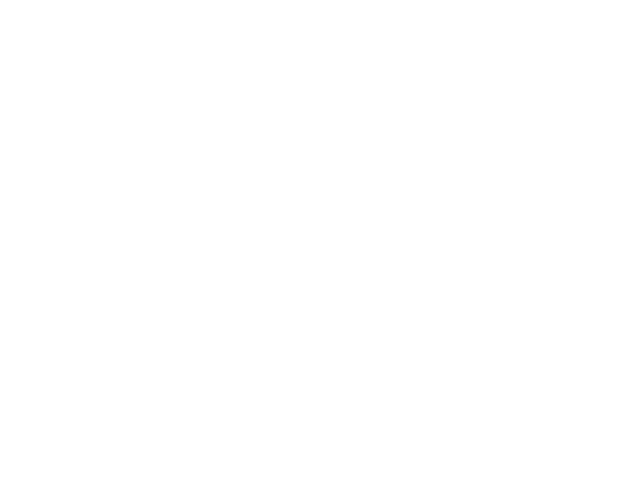

C:\Users\abduo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [21]:
%matplotlib notebook
G.add_edges_from([('A','C'),('A','B'),('B','C'),('C','D'),('D','E'),('E','F'),('E','G'),('F','G')])
pos = nx.spring_layout(G)
edges = G.edges()
nx.draw_networkx(G, pos=pos, edges=edges)

In [22]:
# endpoints, whether you use the node that you're computing the centrality of as one of the endpoints in 
#the computation of its centrality. 
btwn = nx.betweenness_centrality(G,normalized=True,endpoints=False) #81 
btwn

{'A': 0.0,
 'C': 0.5333333333333333,
 'B': 0.0,
 'D': 0.6,
 'E': 0.5333333333333333,
 'F': 0.0,
 'G': 0.0}

all shortest path way for e excluding e
- a->f
 - a->g
 - b->f
 - b->g
 - c->f
 - c->g
 - d->f
 - d->g
 - so = 8 
 - then we normlized (7-1)(7-2)*.5 =15 
 - then 9/15 = .53333

In [23]:
import operator 
sorted(btwn.items(),key=operator.itemgetter(1),reverse=True)[:5]

[('D', 0.6),
 ('C', 0.5333333333333333),
 ('E', 0.5333333333333333),
 ('A', 0.0),
 ('B', 0.0)]

In [24]:
# complexity can take up O(|N|power3)
#N=2200nodes ->nearly 4.8milions pairs of nodes
"""So one of the things that you can do is rather than the computing betweenness centrality based on 
all the nodes s and t, all the possible nodes s, t in the network, you can approximate it by just looking at a sample of nodes,
instead of looking at all the nodes. And in network x,
you can do this by using the parameter k that says how many nodes you should use to compute the betweenness centrality."""
btwn = nx.betweenness_centrality(G,normalized=True,endpoints=False,k=2)
sorted(btwn.items(),key=operator.itemgetter(1),reverse=True)[:5]

[('C', 0.9333333333333333),
 ('D', 0.7),
 ('E', 0.4666666666666667),
 ('A', 0.0),
 ('B', 0.0)]

In [25]:
# we can subset the graoh ..another solution like K
btw = nx.betweenness_centrality_subset(G,['F','G'],['A','B'],normalized=True) #first part is source second is target
btw

{'A': 0.0,
 'C': 0.13333333333333333,
 'B': 0.0,
 'D': 0.13333333333333333,
 'E': 0.13333333333333333,
 'F': 0.0,
 'G': 0.0}

In [26]:
# we can find important edge not just node
btedge= nx.edge_betweenness_centrality(G,normalized=True)
sorted(btedge.items(),key=operator.itemgetter(1),reverse=True)[:]

[(('C', 'D'), 0.5714285714285714),
 (('D', 'E'), 0.5714285714285714),
 (('A', 'C'), 0.23809523809523808),
 (('C', 'B'), 0.23809523809523808),
 (('E', 'F'), 0.23809523809523808),
 (('E', 'G'), 0.23809523809523808),
 (('A', 'B'), 0.047619047619047616),
 (('F', 'G'), 0.047619047619047616)]

In [27]:
btedge1 =nx.edge_betweenness_centrality_subset(G,['F','G'],['A','B'],normalized=True)
sorted(btedge1.items(),key=operator.itemgetter(1),reverse=True)[:]
# And notice that most of them tend to be edges that go from inside the target or inside the source set to the outside

[(('C', 'D'), 0.09523809523809523),
 (('D', 'E'), 0.09523809523809523),
 (('A', 'C'), 0.047619047619047616),
 (('C', 'B'), 0.047619047619047616),
 (('E', 'F'), 0.047619047619047616),
 (('E', 'G'), 0.047619047619047616),
 (('A', 'B'), 0.0),
 (('F', 'G'), 0.0)]

In [28]:
pg = nx.pagerank(G1,alpha=.9)
sorted(pg.items(),key=operator.itemgetter(1),reverse=True)[:]

[('O', 0.2650971896044545),
 ('N', 0.2538442628814144),
 ('L', 0.13297988012090112),
 ('K', 0.0785913430763148),
 ('B', 0.052663036451815484),
 ('I', 0.045823287397211324),
 ('C', 0.02771701191532607),
 ('j', 0.02029625270262374),
 ('D', 0.01750968843018053),
 ('H', 0.016365198971696665),
 ('F', 0.016365198971696665),
 ('J', 0.016365198971696665),
 ('G', 0.015259494656089001),
 ('E', 0.015259494656089001),
 ('A', 0.012931730596245077),
 ('M', 0.012931730596245077)]

# Hubs and Authorities

In [29]:
"""his way was also developed in the context of how a search engine might go about finding important web pages 
given a query using the hyperlink structure of the web"""
# So the first step will be to find a set of relevant webpages
"""So for example, web pages that contain the query string in the text of the web page or 
for some reason the search engine thinks these might be an important page to look at.
So these are potential authorities, potential pages that are important given the query that the user submitted. 
This will be called the root set"""
"""And the next step will be to find all the web pages that link to any page in the root set,
and these pages will be potential hubs. 
So hubs are pages that are not themselves necessarily relevant to the query that the user submitted, 
but they link to pages that are relevant. 
So they're pages that are good at pointing at things that may be relevant."""

"And the next step will be to find all the web pages that link to any page in the root set,\nand these pages will be potential hubs. \nSo hubs are pages that are not themselves necessarily relevant to the query that the user submitted, \nbut they link to pages that are relevant. \nSo they're pages that are good at pointing at things that may be relevant."

In [45]:
#HITS algorithm
#diff betwee it and PR it just a subset in network 
#hits work like PR by k steps but assign 2 scores for every node authority and hub score
nx.hits(G1)[1]

{'A': 0.0,
 'B': 0.30002201664239436,
 'G': 0.1138489842682182,
 'E': 0.1138489842682182,
 'C': 0.2629169366061365,
 'N': 0.1299163237399512,
 'D': 0.07944674536926143,
 'H': 8.76384658874673e-10,
 'I': 2.608089728085251e-09,
 'F': 8.76384658874673e-10,
 'J': 8.76384658874673e-10,
 'j': 5.241375165776839e-10,
 'O': 2.0002014662985474e-09,
 'L': 6.721187226516459e-10,
 'M': 0.0,
 'K': 6.721187226516459e-10}

<IPython.core.display.Javascript object>


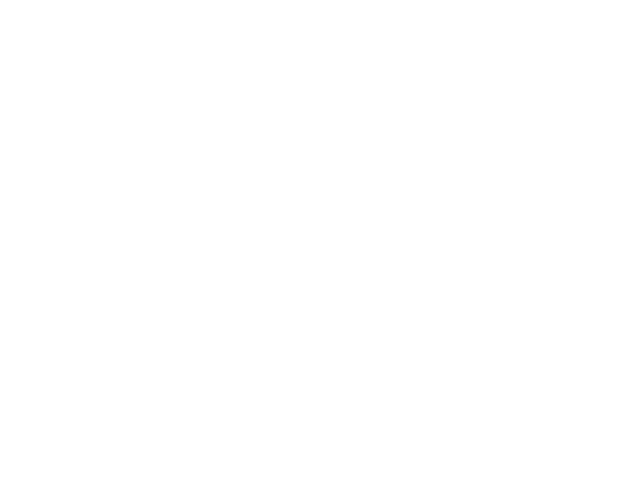

In [31]:
import networkx as nx 
Gn = nx.Graph()
Gn.add_edges_from([('A','B'),('A','C'),('B','D'),('C','D'),('C','E'),('E','D'),('E','G'),('G','D'),('G','F')])
%matplotlib notebook
pos = nx.spring_layout(Gn)
edges = Gn.edges()
nx.draw_networkx(Gn, pos=pos, edges=edges)

In [32]:
degcent=nx.degree_centrality(Gn)
degcent['D']

0.6666666666666666

In [33]:
clocenter = nx.closeness_centrality(Gn)
clocenter['G']

0.6

In [34]:
btwn = nx.betweenness_centrality(Gn,normalized=True,endpoints=False) #81 
btwn

{'A': 0.03333333333333333,
 'B': 0.07777777777777777,
 'C': 0.18888888888888888,
 'D': 0.38888888888888884,
 'E': 0.1111111111111111,
 'G': 0.3333333333333333,
 'F': 0.0}

In [35]:
btwn = nx.betweenness_centrality(Gn,normalized=False,endpoints=False) #81 
btwn

{'A': 0.5,
 'B': 1.1666666666666665,
 'C': 2.8333333333333335,
 'D': 5.833333333333333,
 'E': 1.6666666666666665,
 'G': 5.0,
 'F': 0.0}

<IPython.core.display.Javascript object>


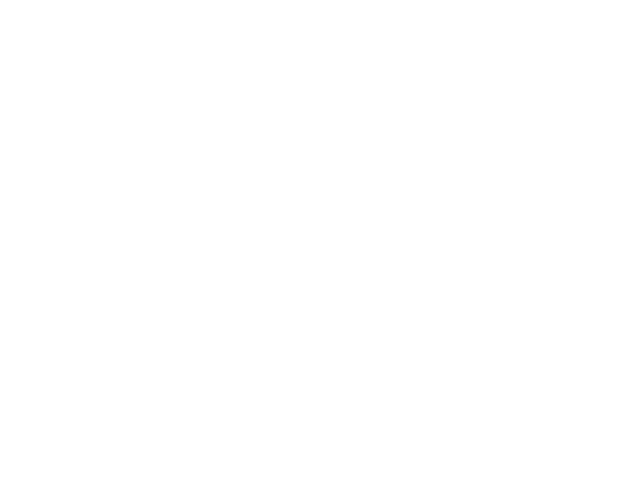

In [36]:
GG = nx.DiGraph()
GG.add_edges_from([('B','A'),('A','B'),('A','C'),('C','D'),('D','C')])
%matplotlib notebook
pos = nx.spring_layout(GG)
edges = GG.edges()
nx.draw_networkx(GG, pos=pos, edges=edges)

In [42]:
pg = nx.pagerank(GG,alpha=.95)
pg['B']

0.03360050631947267

In [38]:
Gt = nx.DiGraph()
Gt.add_edges_from([('A','B'),('B','C'),('A','C'),('C','A'),('D','C')])
%matplotlib notebook
pos = nx.spring_layout(Gt)
edges = Gt.edges()
nx.draw_networkx(Gt, pos=pos, edges=edges)

<IPython.core.display.Javascript object>

In [39]:
nx.hits(Gt,k=2)

TypeError: hits() got an unexpected keyword argument 'k'